In [33]:
### Dependencies and Configuration ###

#from config import password2
#from config import pw2
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
import matplotlib 
#import pyplot as plt


In [34]:
#### IMPORT DATA #####
# Using panda red_excel to import the data from the excel file

EXCEL_PATH = 'data/ATLAS/FoodEnvironmentAtlas.xls'
VARIABLE_PATH = 'data/ATLAS/variables.csv'


# Import entire excel files as a large dictionary with sheet names as keys

global_dict = pd.read_excel(EXCEL_PATH,
sheet_name=['Supplemental Data - County','ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'LOCAL', 'HEALTH', 'SOCIOECONOMIC'])


#global_dict

In [35]:
## CLEANING DATA ##
### LISTS OF COLUMNS I WANT FROM EACH SHEET ####

POPULATION_LIST = ['FIPS','County',
'State',
'2010_Census_Population',
'Population_Estimate_2011',
'Population_Estimate_2012',
'Population_Estimate_2013',
'Population_Estimate_2014',
'Population_Estimate_2015',
'Population_Estimate_2016',
'Population_Estimate_2017',
'Population_Estimate_2018'
]

ACCESS_LIST = ['FIPS',
'PCT_LACCESS_POP10',
'PCT_LACCESS_POP15',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_LOWI15',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_CHILD15',
'PCT_LACCESS_SENIORS10',
'PCT_LACCESS_SENIORS15',
'PCT_LACCESS_HHNV10',
'PCT_LACCESS_HHNV15',
'PCT_LACCESS_SNAP15',
# White
'PCT_LACCESS_WHITE15',

# Black
'PCT_LACCESS_BLACK15',

# Hispanic
'PCT_LACCESS_HISP15',

# Asian
'PCT_LACCESS_NHASIAN15',
# Native American
'PCT_LACCESS_NHNA15',

# Pacific Islander
'PCT_LACCESS_NHPI15',

'PCT_LACCESS_MULTIR15']

STORES_LIST = ['FIPS',
'GROCPTH11',
'GROCPTH16',
'SUPERCPTH11',
'SUPERCPTH16',
'CONVSPTH11',
'CONVSPTH16',
'SPECS11',
'SPECS16',
'SNAPSPTH12',
'SNAPSPTH17',
'WICSPTH11',
'WICSPTH16']

RESTAURANTS_LIST = ['FIPS','FFRPTH11',
'FFRPTH16',
'FSRPTH11',
'FSRPTH16']

ASSISTANCE_LIST = ['FIPS',
'REDEMP_SNAPS12',
'REDEMP_SNAPS17',
'PCT_SNAP12',
'PCT_SNAP17',
'PC_SNAPBEN12',
'PC_SNAPBEN17',
'SNAP_PART_RATE11',
'SNAP_PART_RATE16',
'PC_WIC_REDEMP11',
'PC_WIC_REDEMP16',
'REDEMP_WICS11',
'REDEMP_WICS16',
'PCT_REDUCED_LUNCH10',
'PCT_REDUCED_LUNCH15',
]

# Data is All at the State level
INSECURITY_LIST = ['FIPS',
'FOODINSEC_12_14',
'FOODINSEC_15_17',
'VLFOODSEC_12_14',
'VLFOODSEC_15_17']

LOCAL_LIST = ['FIPS',
#Farms with direct sales (%)

'PCT_LOCLFARM07','PCT_LOCLFARM12',


#Direct farm sales per capita, 2007	
'PC_DIRSALES07',
#Direct farm sales per capita, 2012	
'PC_DIRSALES12',


#Farmers' markets/1,000 pop, 2013	
'FMRKTPTH13',
#Farmers' markets/1,000 pop, 2018	
'FMRKTPTH18',

#Farms with vegetables harvested for fresh market, 2007	
'FRESHVEG_FARMS07',
#Farms with vegetables harvested for fresh market, 2012	
'FRESHVEG_FARMS12',



# Vegetable acres harvested for fresh market/1,000 pop, 2007	
'FRESHVEG_ACRESPTH07',
# Vegetable acres harvested for fresh market/1,000 pop, 2012	
'FRESHVEG_ACRESPTH12',

'FMRKTPTH13',
'FMRKTPTH18',
'FOODHUB18']

HEALTH_LIST = ['FIPS',
'PCT_DIABETES_ADULTS08',
'PCT_DIABETES_ADULTS13',
'PCT_OBESE_ADULTS12',
'PCT_OBESE_ADULTS17',
'PCT_HSPA17',
'RECFACPTH11',
'RECFACPTH16']

SOCIOECONOMIC_LIST = ['FIPS',
'PCT_NHWHITE10',
'PCT_NHBLACK10',
'PCT_HISP10',
'PCT_NHASIAN10',
'PCT_NHNA10',
'PCT_NHPI10',
'PCT_65OLDER10',
'PCT_18YOUNGER10',
'MEDHHINC15',
'POVRATE15',
'PERPOV10',
'CHILDPOVRATE15',
'PERCHLDPOV10',
'METRO13']


GLOBAL_LIST = POPULATION_LIST + ACCESS_LIST + STORES_LIST + RESTAURANTS_LIST + ASSISTANCE_LIST + INSECURITY_LIST + LOCAL_LIST + HEALTH_LIST + SOCIOECONOMIC_LIST

len(GLOBAL_LIST)

106

In [36]:
### USE THE LISTS ABOVE TO CREATE DATAFRAMES FROM EACH SHEET ###

population_df = global_dict['Supplemental Data - County'][POPULATION_LIST]
access_df = global_dict['ACCESS'][ACCESS_LIST]
store_df = global_dict['STORES'][STORES_LIST]
restaurants_df = global_dict['RESTAURANTS'][RESTAURANTS_LIST]
assistance_df = global_dict['ASSISTANCE'][ASSISTANCE_LIST]
insecurity_df = global_dict['INSECURITY'][INSECURITY_LIST]
local_df = global_dict['LOCAL'][LOCAL_LIST]
health_df = global_dict['HEALTH'][HEALTH_LIST]
socioeconomic_df = global_dict['SOCIOECONOMIC'][SOCIOECONOMIC_LIST]

#access_df.head()

In [37]:
#### MERGE ALL DATAFRAMES INTO ONE DATAFRAME #####

DATAFRAME_LIST = ['access_df','population_df', 'store_df', 'restaurants_df', 'assistance_df', 'insecurity_df', 'local_df', 'health_df', 'socioeconomic_df']

new_df = pd.concat([population_df,access_df, store_df, restaurants_df, assistance_df, insecurity_df, local_df, health_df, socioeconomic_df], axis=1)

new_df.head()


,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,...,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13
0,1001.0,Autauga County,Alabama,54571.0,55208.0,54936.0,54713.0,54876.0,54838.0,55242.0,...,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0.0,18.8,0.0,1.0
1,1003.0,Baldwin County,Alabama,182265.0,186540.0,190143.0,194886.0,199189.0,202995.0,207712.0,...,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0.0,19.6,0.0,1.0
2,1005.0,Barbour County,Alabama,27457.0,27350.0,27174.0,26944.0,26758.0,26294.0,25819.0,...,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1.0,45.2,1.0,0.0
3,1007.0,Bibb County,Alabama,22915.0,22747.0,22664.0,22516.0,22541.0,22562.0,22576.0,...,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0.0,29.3,1.0,1.0
4,1009.0,Blount County,Alabama,57322.0,57554.0,57570.0,57611.0,57521.0,57522.0,57517.0,...,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0.0,22.2,0.0,1.0


In [38]:
new_df.dtypes

FIPS                        float64
County                       object
State                        object
2010_Census_Population      float64
Population_Estimate_2011    float64
                             ...   
POVRATE15                   float64
PERPOV10                    float64
CHILDPOVRATE15              float64
PERCHLDPOV10                float64
METRO13                     float64
Length: 106, dtype: object

In [39]:
### OUTPUT THE MERGED DATAFRAME TO A CSV FILE ###

new_df.to_csv('data/ATLAS/segment_3.csv')

In [40]:
# Lambda function to parse dataframe column names
# We need to parse the names in order to group them and average then so we can flatten the matching variables into one column

s = 'Population_Estimate_2011'
result = ''.join(i for i in s if not i.isdigit())
result

'Population_Estimate_'

In [41]:
## Rename Dataframe to play nice with Machine Learning Code

df = new_df

In [42]:
# Create a dictionary of the column names 
# Top level of the dictionary is the column name we want to output
# next level is a list of the column names we want to average
# For many of our features we have the same measure from muptiple years
# This operation will average the values from the multiple years

column_dict={}
for each_column in df.columns: 
    s=each_column
    result=''.join(i for i in s if not i.isdigit())
    if result in column_dict: 
        column_dict[result].append(each_column)
    else: 
        column_dict[result]=[each_column]

In [43]:
# Display Column Dictionary
column_dict


# Create new empty DF for averaged values after we loop through the column_dict
new_df=pd.DataFrame()

In [44]:
# This function goes through the dictionary and applys the .mean function across the rows

for each_column_group in column_dict: 
    new_df[each_column_group]=df[column_dict[each_column_group]].mean(axis=1)
new_df

C:\Users\Justin\AppData\Local\Temp\ipykernel_16468\1927753508.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df[each_column_group]=df[column_dict[each_column_group]].mean(axis=1)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16468\1927753508.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df[each_column_group]=df[column_dict[each_column_group]].mean(axis=1)


,FIPS,County,State,_Census_Population,Population_Estimate_,PCT_LACCESS_POP,PCT_LACCESS_LOWI,PCT_LACCESS_CHILD,PCT_LACCESS_SENIORS,PCT_LACCESS_HHNV,...,PCT_NHNA,PCT_NHPI,PCT_OLDER,PCT_YOUNGER,MEDHHINC,POVRATE,PERPOV,CHILDPOVRATE,PERCHLDPOV,METRO
0,1001.000000,NaN,NaN,54571.0,55107.125,32.915956,10.892328,8.648799,4.186328,3.318059,...,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0.0,18.8,0.0,1.0
1,1003.000000,NaN,NaN,182265.0,201513.250,18.042981,5.442344,4.094068,3.287705,2.026471,...,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0.0,19.6,0.0,1.0
2,1005.000000,NaN,NaN,27457.0,26297.250,21.473266,11.079991,3.591702,2.903430,4.232624,...,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1.0,45.2,1.0,0.0
3,1007.000000,NaN,NaN,22915.0,22570.125,4.395039,2.373144,1.051380,0.628936,3.140004,...,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0.0,29.3,1.0,1.0
4,1009.000000,NaN,NaN,57322.0,57620.250,4.599110,1.971309,1.130105,0.611426,3.302897,...,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0.0,22.2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56039.222222,NaN,NaN,21118.0,20735.375,29.174448,6.192436,5.147887,3.086148,0.957535,...,0.356908,0.061050,9.852541,19.141542,83290.0,6.6,0.0,7.6,0.0,0.0
3140,56041.222222,NaN,NaN,8533.0,8239.125,21.205050,8.458650,6.572062,1.888616,1.863071,...,0.582442,0.161000,8.873946,30.168577,62968.0,9.8,0.0,11.9,0.0,0.0
3141,56043.222222,NaN,NaN,7208.0,7107.125,10.915407,3.179765,2.162275,2.572249,0.799968,...,0.597680,0.011719,17.672565,25.454119,56088.0,11.2,0.0,15.7,0.0,0.0
3142,56045.000000,NaN,NaN,NaN,NaN,17.187570,4.094344,3.505837,2.967172,2.605901,...,1.193119,0.027747,15.940622,21.822974,60986.0,9.8,0.0,13.1,0.0,0.0


In [45]:
# Set the index to the FIPS values
# Each FIPS value is a single county

# new_df=new_df.set_index('FIPS')
# new_df

In [46]:
# Check the dataframe to make sure we don't have null values or funky datatypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3143
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FIPS                  3143 non-null   float64
 1   County                0 non-null      float64
 2   State                 0 non-null      float64
 3   _Census_Population    3142 non-null   float64
 4   Population_Estimate_  3142 non-null   float64
 5   PCT_LACCESS_POP       3143 non-null   float64
 6   PCT_LACCESS_LOWI      3143 non-null   float64
 7   PCT_LACCESS_CHILD     3143 non-null   float64
 8   PCT_LACCESS_SENIORS   3143 non-null   float64
 9   PCT_LACCESS_HHNV      3143 non-null   float64
 10  PCT_LACCESS_SNAP      3123 non-null   float64
 11  PCT_LACCESS_WHITE     3124 non-null   float64
 12  PCT_LACCESS_BLACK     3124 non-null   float64
 13  PCT_LACCESS_HISP      3124 non-null   float64
 14  PCT_LACCESS_NHASIAN   3124 non-null   float64
 15  PCT_LACCESS_NHNA     

In [47]:
# Get Rid of Problem Columns

new_df = new_df.drop(columns=['METRO','State', 'County', 'FOODHUB','PCT_HSPA','REDEMP_WICS'])



In [48]:
# Check The DF

new_df.head()

new_df.shape

(3144, 53)

In [49]:
### DRTOPS TOO MANY ROWAS

## AQBOUT HALF OF THEM ARE DROPPED

### DONT KNOW WHAT COLUMN IS THE PROBLEM


## Drop rows with empty fields before analysis
#new_df=new_df.dropna()

In [50]:
new_df.isna().sum()

FIPS                       1
_Census_Population         2
Population_Estimate_       2
PCT_LACCESS_POP            1
PCT_LACCESS_LOWI           1
PCT_LACCESS_CHILD          1
PCT_LACCESS_SENIORS        1
PCT_LACCESS_HHNV           1
PCT_LACCESS_SNAP          21
PCT_LACCESS_WHITE         20
PCT_LACCESS_BLACK         20
PCT_LACCESS_HISP          20
PCT_LACCESS_NHASIAN       20
PCT_LACCESS_NHNA          20
PCT_LACCESS_NHPI          20
PCT_LACCESS_MULTIR        20
GROCPTH                    1
SUPERCPTH                  1
CONVSPTH                   1
SPECS                      1
SNAPSPTH                   1
WICSPTH                  135
FFRPTH                     1
FSRPTH                     1
REDEMP_SNAPS             192
PCT_SNAP                   1
PC_SNAPBEN                57
SNAP_PART_RATE             1
PC_WIC_REDEMP           1062
PCT_REDUCED_LUNCH         21
FOODINSEC__                1
VLFOODSEC__                1
PCT_LOCLFARM              69
PC_DIRSALES              119
FMRKTPTH      

In [51]:
## Drop columns with empty fields before analysis

new_df = new_df.drop(columns=['PC_WIC_REDEMP','FRESHVEG_ACRESPTH'])

new_df = new_df.dropna()

new_df.shape


### Loked at thgis 2704 x 51 frame in Tableau
# It is missing data from Washington, Wyoming, Colorade, California, Arizona, Arkansas, Wisconsin, West Virginia, Conneticut Lousiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, and most of Mississippi



(2704, 51)

In [52]:
## Output the cleaned dataframe to a csv file

# The DF is cleaned and what our ML learning is based on


new_df.to_csv('data/ATLAS/segment_3_cleaned.csv')

In [53]:
# Define our target variable / feature

#target='PCT_OBESE_ADULTS'
target='PCT_DIABETES_ADULTS'

In [75]:
# Create a list of the features we want to use and put our target column in at y


#X=new_df.drop(columns=['PCT_OBESE_ADULTS', 'PCT_DIABETES_ADULTS'])
y=new_df[target]


# Comment out the above and try this one to include the obersity rate int the model
X=new_df.drop(columns=['PCT_DIABETES_ADULTS','FIPS'])

In [76]:
# Make sure we still match
display(X.shape)
display(y.shape)

(2704, 49)

(2704,)

In [77]:
#### jRight now only have 1649 Rows, half the set we started with





In [78]:
# Machine Learning Dependnecies and tools


import sklearn

# get Standard Scaler from sklearn
from sklearn.preprocessing import StandardScaler
# get Random Forest Regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Get train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import GridSearchCV


In [79]:
# Split our data into training and testing sets

X_train, X_test, y_train, y_test=train_test_split(X, y)

In [80]:
# Apply the Standard Scaler to all of our data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [81]:
# Fit our Random Forest Regressor

rfr=RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)
# rfr.evaluate(X_train_scaled, y_train)

RandomForestRegressor()

In [82]:
# Checkout the model score for training data
rfr.score(X_train_scaled, y_train)

0.9760413518941901

In [83]:
# Check model score for testing data
rfr.score(X_test_scaled, y_test)

0.8319185777338242

In [84]:
# Predicting the Test set results
y_pred = rfr.predict(X_test)

c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [65]:
## Try to solve the catagory error,

## solution from 
#https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

y=y.astype('int')

In [66]:

# Set the paramerters I want to test
# Code from https://stackoverflow.com/questions/52513495/randomforest-how-to-choose-the-optimal-n-estimator-parameter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_to_test = {
    'n_estimators':[2,5,7],
    'max_depth':[3,5,6]
}

#here you can put any parameter you want at every run, like random_state or verbosity
rf_model = RandomForestClassifier(random_state=42)
#here you specify the CV parameters, number of folds, numberof cores to use...
grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 

#best_params is a dict you can pass directly to train a model with optimal settings 
best_model = RandomForestClassifier(**best_params)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py", line 371, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py", line 758, in _validate_y_class_weight
    check_classification_targets(y)
  File "c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [85]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6659215976331327
Mean Squared Error: 9.762568411982224
Root Mean Squared Error: 3.1245109076433426


In [86]:
# Create and display a list of the features order of importance according to the model
sorted(list(zip(rfr.feature_importances_, X_train.columns)), reverse=True)

[(0.26683503417705967, 'CHILDPOVRATE'),
 (0.2059156634119411, 'PCT_OBESE_ADULTS'),
 (0.07491718122493485, 'PCT_NHBLACK'),
 (0.04914983316730384, 'MEDHHINC'),
 (0.047824805193273076, 'PCT_HISP'),
 (0.03963843451338032, 'PCT_OLDER'),
 (0.03118943880740744, 'PCT_LACCESS_HHNV'),
 (0.0309267520982987, 'PCT_SNAP'),
 (0.03045939471862668, 'SNAPSPTH'),
 (0.022538208593264553, 'VLFOODSEC__'),
 (0.021502355319309534, 'PCT_NHASIAN'),
 (0.010331694726866285, 'PC_SNAPBEN'),
 (0.010082210376014282, 'FOODINSEC__'),
 (0.009250352774567247, 'PCT_NHWHITE'),
 (0.008728433233593624, 'FSRPTH'),
 (0.007551666271328478, 'PCT_YOUNGER'),
 (0.007135287309666256, 'RECFACPTH'),
 (0.006595086811747147, 'SNAP_PART_RATE'),
 (0.006379693641929813, 'PC_DIRSALES'),
 (0.0062291677537759235, 'PCT_REDUCED_LUNCH'),
 (0.006200514662746229, 'CONVSPTH'),
 (0.005907010082705763, 'FMRKTPTH'),
 (0.0057800458378744176, 'PCT_LOCLFARM'),
 (0.005663504791227424, 'PCT_LACCESS_BLACK'),
 (0.00548637693064198, 'WICSPTH'),
 (0.0053184273

In [70]:
### Import plotting tools and dependencies

from matplotlib import pyplot as plt

<BarContainer object of 50 artists>

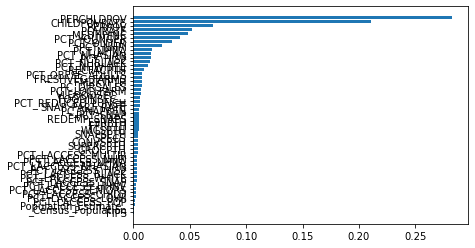

In [71]:
sorted_ind = rfr.feature_importances_.argsort()

# Plot the sorted feratures

plt.barh(X_train.columns, rfr.feature_importances_[sorted_ind])

c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Justin\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

count      2704.000000
mean      48714.997041
std       12146.366493
min       23014.000000
25%       40734.250000
50%       46890.500000
75%       54184.500000
max      125900.000000
Name: MEDHHINC, dtype: float64

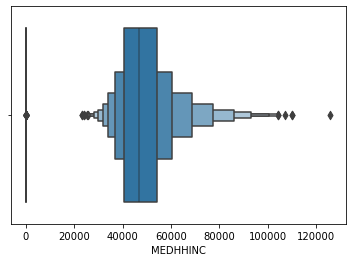

In [95]:
#### OUTLIER DETECTION

import seaborn as sns

sns.boxplot(new_df['PCT_DIABETES_ADULTS'])

sns.boxplot(new_df['PCT_OBESE_ADULTS'])

sns.boxenplot(new_df['CHILDPOVRATE'])

sns.boxenplot(new_df['MEDHHINC'])

new_df['MEDHHINC'].describe()
